#### Breast Cancer

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error,confusion_matrix,accuracy_score,classification_report,roc_curve, RocCurveDisplay,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
import os

In [2]:
wisconsin = pd.read_csv('Cases\Wisconsin\BreastCancer.csv')
wisconsin

<>:1: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
<>:1: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_15676\1372893083.py:1: SyntaxWarning: "\W" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\W"? A raw string is also an option.
  wisconsin = pd.read_csv('Cases\Wisconsin\BreastCancer.csv')


,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [3]:
le = LabelEncoder()
wisconsin['Class'] = le.fit_transform(wisconsin['Class'])


In [4]:
X,y = wisconsin.drop('Class', axis=1), wisconsin['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)


In [5]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print(confusion_matrix(y_test, y_pred))

[[133   5]
 [  3  69]]


In [7]:
le.inverse_transform(wisconsin['Class'])

array(['Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign

In [8]:
accuracy_score(y_test, y_pred)

0.9619047619047619

In [9]:
#changing solver and penalty
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.97      0.97      0.97        72

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [10]:
#changing solver and penalty
model = LogisticRegression() #saga support all penelty type
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9619047619047619

#### Human Resource

In [11]:
hr = pd.read_csv('Datasets/HR.csv')

# sc=StandardScaler()
# hr['average_montly_hours'] = sc.fit_transform(hr[['average_montly_hours']])
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [12]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder


X,y = hr.drop('left', axis=1), hr['left']

ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')

col_trnf = ColumnTransformer([('OHE', ohe, make_column_selector(dtype_include = object))],
                             remainder = 'passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)

In [14]:

model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [15]:
print(confusion_matrix(y_test, y_pred))

[[3172  257]
 [ 697  373]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3429
           1       0.59      0.35      0.44      1070

    accuracy                           0.79      4499
   macro avg       0.71      0.64      0.65      4499
weighted avg       0.77      0.79      0.77      4499



In [17]:
accuracy_score(y_test,y_pred)

0.7879528784174261

In [18]:
#Changing solver and penlaties
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]
scores= []

for s in solvers:
    for p in penalties:
        
        model = LogisticRegression(solver=s, penalty=p)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append([s,p, accuracy_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns=['solvers', 'penalties', 'scores' ])
print(df_scores.sort_values(by = 'scores', ascending=False))

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown i

           solvers penalties    scores
0            lbfgs        l2  0.792176
1            lbfgs      None  0.789509
4  newton-cholesky        l2  0.786842
2        newton-cg        l2  0.786619
3        newton-cg      None  0.786619
5  newton-cholesky      None  0.786397
9             saga      None  0.758168
8             saga        l2  0.758168
6              sag        l2  0.749500
7              sag      None  0.749278


c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### ROC

In [19]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:,1]

array([0.34340562, 0.28704721, 0.3730203 , ..., 0.28798517, 0.29802787,
       0.28607938], shape=(4499,))

In [20]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1] ) #return 3 value fpr, tpr, thresholds
print(fpr, tpr, thresholds)

[0.00000000e+00 2.91630213e-04 8.74890639e-04 ... 9.94750656e-01
 9.95333917e-01 1.00000000e+00] [0. 0. 0. ... 1. 1. 1.] [       inf 0.59889884 0.5625675  ... 0.09662568 0.09570216 0.07777886]


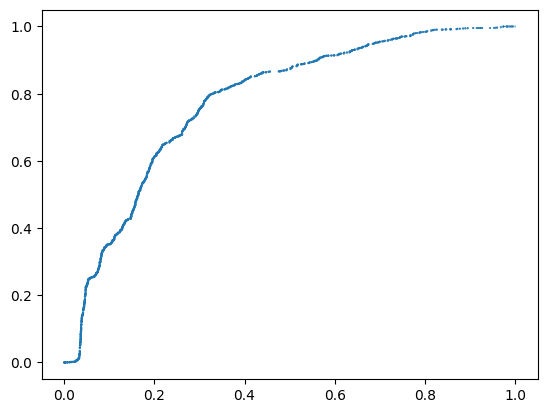

In [21]:
plt.scatter(fpr, tpr, thresholds)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_test, y_pred_prob[:,1])

0.7767112833637227

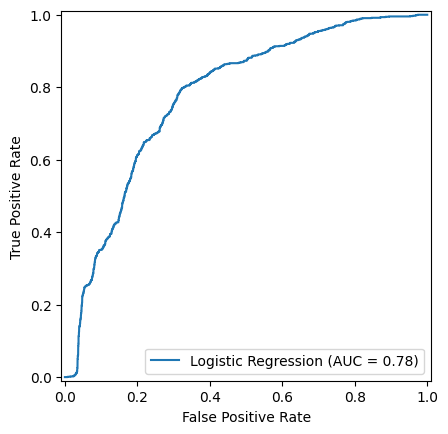

In [23]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob[:,1]),
                       name='Logistic Regression')
disp.plot()
plt.show()